# CSE 330 Numerical Analysis Lab 



## Assignment 2: Differentiation

We have already learnt about *forward differentiation*, *backward diferentiation* and *central differentiation*. In this part of the assignment we will write methods to calculate this values and check how they perform.

The equations are as follows,

\begin{align}
\text{forward differentiation}, f^\prime(x) \simeq \frac{f(x+h)-f(x)}{h} \tag{4.6} \\
\text{backward differentiation}, f^\prime(x) \simeq \frac{f(x)-f(x-h)}{h} \tag{4.7} \\
\text{central differentiation}, f^\prime(x) \simeq \frac{f(x+h)-f(x-h)}{2h} \tag{4.8}
\end{align}

Importing libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

Here, `forward_diff`, `backward_diff` and `central_diff` calculates the *forward differentiation*, *backward differentiation* and *central differentiation* respectively. finally the `error` method calculates the different values for various $h$ and returns the errors.

Later we will run some code to test out performance. The first one is done for you.

In [16]:
def forward_diff(f, h, x):
    return (f(x+h) - f(x))/h

In [17]:
def backward_diff(f, h, x):
    return (f(x)-f(x-h))/h

In [18]:
def central_diff(f, h, x):
    return (f(x+h)-f(x-h))/(2*h)

In [19]:
def error(f, f_prime, h, x):
    y_correct = f_prime(x)
    f_error = np.array([])
    b_error = np.array([])
    c_error = np.array([])
    
    for h_i in h:
        
        f_error_h_i = forward_diff(f, h_i, x) - y_correct
        f_error = np.append(f_error, f_error_h_i)
        b_error_h_i = backward_diff(f, h_i, x) - y_correct
        b_error = np.append(b_error, b_error_h_i)
        c_error_h_i = central_diff(f, h_i, x) - y_correct
        c_error = np.append(c_error, c_error_h_i)
    
    return f_error, b_error, c_error

Plot1: Polynomial and Actual Derivative Function

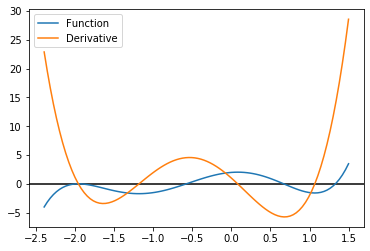

In [20]:
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')

p = Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
data = p.linspace(domain=[-2.4, 1.5])
ax.plot(data[0], data[1], label='Function')

p_prime = p.deriv(1)
data2 = p_prime.linspace(domain=[-2.4, 1.5])
ax.plot(data2[0], data2[1], label='Derivative')

ax.legend()

Plot2: Actual Derivative Function and Forward, Backward, Central Functions with h = 1

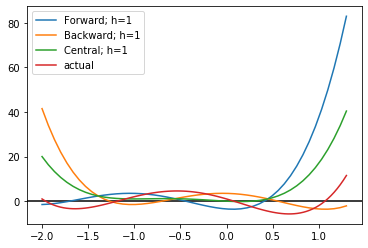

In [21]:
h = 1
fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

x = np.linspace(-2.0, 1.3, 50, endpoint=True)
y = forward_diff(p, h, x)
bx.plot(x, y, label='Forward; h=1')
y = backward_diff(p, h, x)
bx.plot(x, y, label='Backward; h=1')
y = central_diff(p, h, x)
bx.plot(x, y, label='Central; h=1')

data2 = p_prime.linspace(domain=[-2.0, 1.3])
bx.plot(data2[0], data2[1], label='actual')

bx.legend()


Plot3: Actual Derivative Function and Forward, Backward, Central Functions with h = 0.1

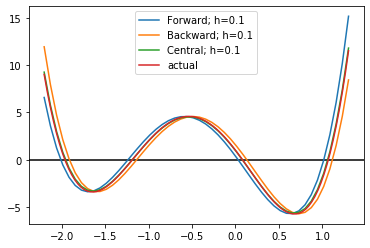

In [22]:
h = 0.1
fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

x = np.linspace(-2.2, 1.3, 50, endpoint=True)
y = forward_diff(p, h, x)
bx.plot(x, y, label='Forward; h=0.1')
y = backward_diff(p, h, x)
bx.plot(x, y, label='Backward; h=0.1')
y = central_diff(p, h, x)
bx.plot(x, y, label='Central; h=0.1')

data2 = p_prime.linspace(domain=[-2.2, 1.3])
bx.plot(data2[0], data2[1], label='actual')

bx.legend()

Plot4: Actual Derivative Function and Forward, Backward, Central Functions with h = 0.01

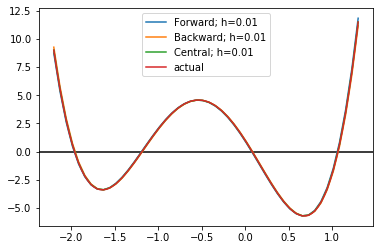

In [23]:
h = 0.01
fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

x = np.linspace(-2.2, 1.3, 50, endpoint=True)
y = forward_diff(p, h, x)
bx.plot(x, y, label='Forward; h=0.01')
y = backward_diff(p, h, x)
bx.plot(x, y, label='Backward; h=0.01')
y = central_diff(p, h, x)
bx.plot(x, y, label='Central; h=0.01')

data2 = p_prime.linspace(domain=[-2.2, 1.3])
bx.plot(data2[0], data2[1], label='actual')

bx.legend()

Plot5: Error Curves for Forward, Backward and Central 

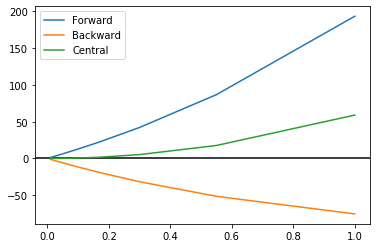

In [24]:
fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

h = np.array([1., 0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01])
err = error(p, p_prime, h, 2.0)

bx.plot(h, err[0], label='Forward')
bx.plot(h, err[1], label='Backward')
bx.plot(h, err[2], label='Central')
bx.legend()